MAG general KEGG database functional annotation

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats import hypergeom, chi2_contingency
import upsetplot as up
import glob
import csv

Import data

In [2]:
#Import results table:

combined_df = pd.read_csv("combined_annotations.csv")
print(combined_df.head())

                   #query                  seed_ortholog         evalue  \
0  Prodigal_2|LOCUS_00010            331678.Cphamn1_1961   2.230000e-26   
1  Prodigal_3|LOCUS_00020            1242864.D187_003286  5.080000e-106   
2  Prodigal_4|LOCUS_00030  1038858.AXBA01000001_gene3203   6.210000e-42   
3  Prodigal_6|LOCUS_00050   1382306.JNIM01000001_gene888  1.140000e-121   
4  Prodigal_7|LOCUS_00060              526222.Desal_0144   5.200000e-31   

   score                                         eggNOG_OGs  \
0  102.0                  COG4113@1|root,COG4113@2|Bacteria   
1  330.0  COG0513@1|root,COG0513@2|Bacteria,1MU49@1224|P...   
2  140.0  COG0278@1|root,COG0278@2|Bacteria,1MZ4V@1224|P...   
3  362.0  COG0042@1|root,COG0042@2|Bacteria,2G6XB@200795...   
4  117.0  COG0242@1|root,COG0242@2|Bacteria,1RA2P@1224|P...   

               max_annot_lvl COG_category  \
0                 2|Bacteria            S   
1  28221|Deltaproteobacteria            L   
2  28211|Alphaproteobacteria       

In [3]:
# Mapping of MAG names to taxon names and MAG_codes
mag_to_taxon = {
    "C_27077.fna": "UBA5704 (a)",
    "C_maxbin_C.028.fasta": "HGW-15",
    "C_metabat_C.121.fa": "ZC4RG35 (a)",
    "C_metabat_C.124.fa": "Micropepsaceae",
    "C_metabat_C.125.fa": "SZUA-232",
    "C_metabat_C.19.fa": "Nitriliruptoraceae",
    "C_metabat_C.25.fa": "E44-bin32 (a)",
    "C_metabat_C.37.fa": "SZUA-229",
    "C_metabat_C.46.fa": "JABDQX01",
    "C_metabat_C.60.fa": "UBA5704 (b)",
    "C_metabat_C.7.fa": "Pseudonocardiaceae",
    "C_metabat_C.74.fa": "Balneolaceae (a)",
    "C_metabat_C.81.fa": "Promineofilaceae (a)",
    "C_metabat_C.83.fa": "UBA5704 (c)",
    "C_metabat_C.95.fa": "J153",
    "C_metabat_C.98.fa": "ZC4RG35 (b)",
    "CW_23909.fna": "Woeseiaceae (a)",
    "CW_maxbin_CW.098": "Nitrososphaeraceae (a)",
    "CW_maxbin_CW.218": "Nitrososphaeraceae (b)",
    "CW_metabat_CW.108.fa": "RKRQ02 (a)",
    "CW_metabat_CW.111.fa": "UBA6522 (a)",
    "CW_metabat_CW.121.fa": "Methyloligellaceae",
    "CW_metabat_CW.123.fa": "E44-bin32 (b)",
    "CW_metabat_CW.131.fa": "UBA6522 (b)",
    "CW_metabat_CW.20.fa": "SG8-38",
    "CW_metabat_CW.37.fa": "UBA6522 (c)",
    "CW_metabat_CW.57.fa": "UBA6522 (d)",
    "CW_metabat_CW.86.fa": "UBA4486",
    "CW_metabat_CW.95.fa": "JACQBZ02",
    "CW_metabat_CW.96.fa": "GWC2-71-9",
    "L_25727.fna": "Sporolactobacillaceae (a)",
    "L_maxbin_L.002": "Paenibacillaceae",
    "L_maxbin_L.006": "Domibacillaceae",
    "L_maxbin_L.259": "Sporolactobacillaceae (b)",
    "L_metabat_L.102.fa": "Jiangellales",
    "L_metabat_L.108.fa": "SM23-39",
    "L_metabat_L.119.fa": "Flavobacteriaceae",
    "L_metabat_L.121.fa": "Streptomycetaceae",
    "L_metabat_L.18.fa": "Rhodobacteraceae",
    "L_metabat_L.41.fa": "RKRQ01",
    "L_metabat_L.45.fa": "Cellulomonadaceae",
    "L_metabat_L.59.fa": "CECT-8803",
    "L_metabat_L.70.fa": "UBA8139",
    "L_metabat_L.95.fa": "Planctomycetaceae",
    "LW_10211.fna": "GWA1-39-11",
    "LW_10984.fna": "DSSB01",
    "LW_maxbin_LW.013": "Latescibacterales",
    "LW_maxbin_LW.016": "Bacillaceae_C",
    "LW_maxbin_LW.091": "Cyclobacteriaceae",
    "LW_maxbin_LW.269": "Lacipirellulaceae",
    "LW_maxbin_LW.310": "SZUA-584",
    "LW_metabat_LW.102.fa": "JAFGWO01",
    "LW_metabat_LW.105.fa": "QNYZ01",
    "LW_metabat_LW.111.fa": "UBA6522 (e)",
    "LW_metabat_LW.129.fa": "UBA11606",
    "LW_metabat_LW.136.fa": "Alkalibacteraceae",
    "LW_metabat_LW.149.fa": "Balneolaceae (b)",
    "LW_metabat_LW.17.fa": "Promineofilaceae (b)",
    "LW_metabat_LW.43.fa": "Desulfobacterales",
    "LW_metabat_LW.90.fa": "UMGS416",
    "LW_metabat_LW.95.fa": "Anaerolineaceae",
    "P_18661.fna": "Halobacteriales (a)",
    "P_25546.fna": "Hyphomicrobiaceae",
    "P_25897.fna": "JAENVV01",
    "P_maxbin_P.068": "SG8-13 (a)",
    "P_maxbin_P.091": "HXMU1428-3",
    "P_metabat_P.121.fa": "RKSH01",
    "P_metabat_P.131.fa": "SG8-41",
    "P_metabat_P.37.fa": "RKRQ02 (b)",
    "P_metabat_P.50.fa": "Woeseiaceae (b)",
    "P_metabat_P.57.fa": "Halobacteriales (b)",
    "P_metabat_P.77.fa": "SG8-13 (b)",
    "PW_19550.fna": "70-9 (a)",
    "PW_metabat_PW.84.fa": "70-9 (b)"
}

mag_to_magcode = {
    "C_27077.fna": "C_1",
    "C_maxbin_C.028.fasta": "C_2",
    "C_metabat_C.121.fa": "C_3",
    "C_metabat_C.124.fa": "C_4",
    "C_metabat_C.125.fa": "C_5",
    "C_metabat_C.19.fa": "C_6",
    "C_metabat_C.25.fa": "C_7",
    "C_metabat_C.37.fa": "C_8",
    "C_metabat_C.46.fa": "C_9",
    "C_metabat_C.60.fa": "C_10",
    "C_metabat_C.7.fa": "C_11",
    "C_metabat_C.74.fa": "C_12",
    "C_metabat_C.81.fa": "C_13",
    "C_metabat_C.83.fa": "C_14",
    "C_metabat_C.95.fa": "C_15",
    "C_metabat_C.98.fa": "C_16",
    "CW_23909.fna": "CW_1",
    "CW_maxbin_CW.098": "CW_2",
    "CW_maxbin_CW.218": "CW_3",
    "CW_metabat_CW.108.fa": "CW_4",
    "CW_metabat_CW.111.fa": "CW_5",
    "CW_metabat_CW.121.fa": "CW_6",
    "CW_metabat_CW.123.fa": "CW_7",
    "CW_metabat_CW.131.fa": "CW_8",
    "CW_metabat_CW.20.fa": "CW_9",
    "CW_metabat_CW.37.fa": "CW_10",
    "CW_metabat_CW.57.fa": "CW_11",
    "CW_metabat_CW.86.fa": "CW_12",
    "CW_metabat_CW.95.fa": "CW_13",
    "CW_metabat_CW.96.fa": "CW_14",
    "L_25727.fna": "L_1",
    "L_maxbin_L.002":"L_2",
    "L_maxbin_L.006": "L_3",
    "L_maxbin_L.259": "L_4",
    "L_metabat_L.102.fa": "L_5",
    "L_metabat_L.108.fa": "L_6",
    "L_metabat_L.119.fa": "L_7",
    "L_metabat_L.121.fa": "L_8",
    "L_metabat_L.18.fa": "L_9",
    "L_metabat_L.41.fa": "L_10",
    "L_metabat_L.45.fa": "L_11",
    "L_metabat_L.59.fa": "L_12",
    "L_metabat_L.70.fa": "L_13",
    "L_metabat_L.95.fa": "L_14",
    "LW_10211.fna": "LW_1",
    "LW_10984.fna": "LW_2",
    "LW_maxbin_LW.013": "LW_3",
    "LW_maxbin_LW.016": "LW_4",
    "LW_maxbin_LW.091": "LW_5",
    "LW_maxbin_LW.269": "LW_6",
    "LW_maxbin_LW.310": "LW_7",
    "LW_metabat_LW.102.fa": "LW_8",
    "LW_metabat_LW.105.fa": "LW_9",
    "LW_metabat_LW.111.fa": "LW_10",
    "LW_metabat_LW.129.fa": "LW_11",
    "LW_metabat_LW.136.fa": "LW_12",
    "LW_metabat_LW.149.fa": "LW_13",
    "LW_metabat_LW.17.fa": "LW_14",
    "LW_metabat_LW.43.fa":"LW_15",
    "LW_metabat_LW.90.fa": "LW_16",
    "LW_metabat_LW.95.fa": "LW_17",
    "P_18661.fna": "P_1",
    "P_25546.fna": "P_2",
    "P_25897.fna": "P_3",
    "P_maxbin_P.068": "P_4",
    "P_maxbin_P.091":"P_5",
    "P_metabat_P.121.fa": "P_6",
    "P_metabat_P.131.fa": "P_7",
    "P_metabat_P.37.fa": "P_8",
    "P_metabat_P.50.fa": "P_9",
    "P_metabat_P.57.fa": "P_10",
    "P_metabat_P.77.fa": "P_11",
    "PW_19550.fna": "PW_1",
    "PW_metabat_PW.84.fa": "PW_2"
}

taxon_to_magcode = {
    "UBA5704 (a)": "C1",
    "HGW-15": "C2",
    "ZC4RG35 (a)": "C3",
    "Micropepsaceae": "C4",
    "SZUA-232": "C5",
    "Nitriliruptoraceae": "C6",
    "E44-bin32 (a)": "C7",
    "SZUA-229": "C8",
    "JABDQX01": "C9",
    "UBA5704 (b)": "C10",
    "Pseudonocardiaceae": "C11",
    "Balneolaceae (a)": "C12",
    "Promineofilaceae (a)": "C13",
    "UBA5704 (c)": "C14",
    "J153": "C15",
    "ZC4RG35 (b)": "C16",
    "Woeseiaceae (a)": "CW1",
    "Nitrososphaeraceae (a)": "CW2",
    "Nitrososphaeraceae (b)": "CW3",
    "RKRQ02 (a)": "CW4",
    "UBA6522 (a)": "CW5",
    "Methyloligellaceae": "CW6",
    "E44-bin32 (b)": "CW7",
    "UBA6522 (b)": "CW8",
    "SG8-38": "CW9",
    "UBA6522 (c)": "CW10",
    "UBA6522 (d)": "CW11",
    "UBA4486": "CW12",
    "JACQBZ02": "CW13",
    "GWC2-71-9": "CW14",
    "Sporolactobacillaceae (a)": "L1",
    "Paenibacillaceae": "L2",
    "Domibacillaceae": "L3",
    "Sporolactobacillaceae (b)": "L4",
    "Jiangellales": "L5",
    "SM23-39": "L6",
    "Flavobacteriaceae": "L7",
    "Streptomycetaceae": "L8",
    "Rhodobacteraceae": "L9",
    "RKRQ01": "L10",
    "Cellulomonadaceae": "L11",
    "CECT-8803": "L12",
    "UBA8139": "L13",
    "Planctomycetaceae": "L14",
    "GWA1-39-11": "LW1",
    "DSSB01": "LW2",
    "Latescibacterales": "LW3",
    "Bacillaceae_C": "LW4",
    "Cyclobacteriaceae": "LW5",
    "Lacipirellulaceae": "LW6",
    "SZUA-584": "LW7",
    "JAFGWO01": "LW8",
    "QNYZ01": "LW9",
    "UBA6522 (e)": "LW10",
    "UBA11606": "LW11",
    "Alkalibacteraceae": "LW12",
    "Balneolaceae (b)": "LW13",
    "Promineofilaceae (b)": "LW14",
    "Desulfobacterales": "LW15",
    "UMGS416": "LW16",
    "Anaerolineaceae": "LW17",
    "Halobacteriales (a)": "P1",
    "Hyphomicrobiaceae": "P2",
    "JAENVV01": "P3",
    "SG8-13 (a)": "P4",
    "HXMU1428-3": "P5",
    "RKSH01": "P6",
    "SG8-41": "P7",
    "RKRQ02 (b)": "P8",
    "Woeseiaceae (b)": "P9",
    "Halobacteriales (b)": "P10",
    "SG8-13 (b)": "P11",
    "70-9 (a)": "PW1",
    "70-9 (b)": "PW2"
}

In [ ]:
#order =  ['Sporolactobacillaceae (a)', 'Domibacillaceae', 'Paenibacillaceae', 'UMGS416', 'SZUA-584', 'Latescibacterales', 
           'GWA1-39-11', 'Alkalibacteraceae', 'Balneolaceae (b)', 'RKRQ02 (b)', 'JABDQX01', 'Micropepsaceae', 'UBA5704 (b)', 
           'Woeseiaceae (a)', 'UBA6522 (c)', 'UBA6522 (b)', 'UBA6522 (a)', 'UBA5704 (c)', 'Nitrososphaeraceae (b)', 'E44-bin32 (b)', 
           'Methyloligellaceae', 'GWC2-71-9', 'UBA6522 (d)', 'Nitrososphaeraceae (a)', 'UBA4486', 'Rhodobacteraceae', 'Streptomycetaceae', 
           'Cyclobacteriaceae', 'Flavobacteriaceae', 'Cellulomonadaceae', 'SM23-39', 'Sporolactobacillaceae (b)', 'Bacillaceae_C',
           'Planctomycetaceae', 'QNYZ01', 'UBA6522 (e)', 'SG8-13 (b)', 'SG8-13 (a)', 'Desulfobacterales', 'Promineofilaceae (b)', 
           'JACQBZ02', 'SG8-38', 'Balneolaceae (a)', 'CECT-8803', 'Lacipirellulaceae', 'Pseudonocardiaceae', 'HXMU1428-3', '70-9 (a)', 
           'Promineofilaceae (a)', 'UBA8139', 'RKRQ01', 'Halobacteriales (b)', 'SZUA-232', 'J153', 'RKRQ02 (a)', 'UBA5704 (a)', 'JAENVV01',  
           'SG8-41', "Halobacteriales (a)", "Nitriliruptoraceae", "HGW-15", "ZC4RG35 (a)", "ZC4RG35 (b)", "E44-bin32 (a)", "Hyphomicrobiaceae",
           "Woeseiaceae (b)", "70-9 (b)", "UBA11606", "SZUA-229", "RKSH01", "JAFGWO01", "Jiangellales", "Anaerolineaceae", "DSSB01" ]

In [13]:
order =  ["L_1", "L_3", "L_2", "LW_16", "LW_7", "LW_3", "LW_1", "LW_12", "LW_13", "P_8", "C_9", "C_4", "C_10", "CW_1", 
           "CW_10", "CW_8", "CW_5", "C_14", "CW_3", "CW_7", "CW_6", "CW_14", "CW_11", "CW_2", "CW_12", "L_9", "L_8",
           "LW_5", "L_7", "L_11", "L_6", "L_4", "LW_4", "L_14", "LW_9", "LW_10", "P_11", "P_4", "LW_15", "LW_14", "CW_13",
           "CW_9", "C_12", "L_12", "LW_6", "C_11", "P_5", "PW_1", "C_13", "L_13", "L_10", "P_10", "C_5", "C_15", "CW_4",
           "C_1", "P_3", "P_7", "P_1", "C_6", "C_2", "C_3", "C_16", "C_7", "P_2", "P_9", "PW_2", "LW_11", "C_8", "P_6", 
           "LW_8", "L_5", "LW_17", "LW_2"]

Organization of table: gene counts fixed and normalized

In [6]:
#1. Extract KEGG Pathway information
kokegg_counts = combined_df[['MAG', 'KEGG_ko']].copy()

print(kokegg_counts.head(50))

             MAG                        KEGG_ko
0   LW_10984.fna                              -
1   LW_10984.fna                      ko:K11927
2   LW_10984.fna                      ko:K07390
3   LW_10984.fna                              -
4   LW_10984.fna                      ko:K01462
5   LW_10984.fna                      ko:K00604
6   LW_10984.fna                      ko:K01783
7   LW_10984.fna                              -
8   LW_10984.fna                              -
9   LW_10984.fna                              -
10  LW_10984.fna                      ko:K00864
11  LW_10984.fna                      ko:K00013
12  LW_10984.fna                      ko:K06213
13  LW_10984.fna                              -
14  LW_10984.fna                      ko:K00784
15  LW_10984.fna                      ko:K00833
16  LW_10984.fna                              -
17  LW_10984.fna                      ko:K03640
18  LW_10984.fna                              -
19  LW_10984.fna                      ko

In [7]:
kokegg_counts.set_index('MAG', inplace=True)

In [8]:
# Step 2: Construct a table where MAGs are represented as rows and KEGG_ko annotations as columns.
# The counts are adjusted to account for multiple KEGG_ko annotations per CDS within a MAG.
# Specifically, if a CDS in a MAG is annotated with multiple KEGG_ko entries 
# (e.g., "ko:K01657,ko:K01665,ko:K13950") multiple times, the count is distributed 
# equally among the annotated KEGG_kos. This prevents overestimation of individual KEGG_ko occurrences.

#Remove rows where KEGG_ko is "-"
kokegg_countsfixed = kokegg_counts[kokegg_counts["KEGG_ko"] != "-"]

#Initialize a dictionary to store the counts
ko_counts = {}

#Iterate through the DataFrame
for index, row in kokegg_countsfixed.iterrows():
    mag = index  # Extract MAG (from index)
    pathways = row["KEGG_ko"].split(",")  # Split multiple KOs
    
    num_pathways = len(pathways)  # Number of KOs
    
    if mag not in ko_counts:
        ko_counts[mag] = {}
    
    # Step 4: Distribute the count across pathways
    for pathway in pathways:
        if pathway not in ko_counts[mag]:
            ko_counts[mag][pathway] = 0
        
        distributed_count = 1 / num_pathways  # Even distribution
        ko_counts[mag][pathway] += distributed_count

#Convert to DataFrame
kokegg_countsfixed = pd.DataFrame.from_dict(ko_counts, orient='index').fillna(0)

In [14]:
print(kokegg_countsfixed.head())

                     ko:K11927  ko:K07390  ko:K01462  ko:K00604  ko:K01783  \
LW_10984.fna               2.0        1.0        1.0        1.0        1.0   
C_metabat_C.60.fa          1.0        0.0        2.0        1.0        1.0   
L_metabat_L.119.fa         1.0        0.0        1.0        1.0        1.0   
L_metabat_L.121.fa         1.0        0.0        1.0        1.0        1.0   
LW_metabat_LW.43.fa        1.0        0.0        0.5        1.0        1.0   

                     ko:K00864  ko:K00013  ko:K06213  ko:K00784  ko:K00833  \
LW_10984.fna               1.0        1.0        2.0        1.0        1.0   
C_metabat_C.60.fa          0.0        0.0        3.0        2.0        0.0   
L_metabat_L.119.fa         1.0        1.0        1.0        2.0        0.0   
L_metabat_L.121.fa         0.0        0.0        1.0        1.0        1.0   
LW_metabat_LW.43.fa        1.0        1.0        0.0        1.0        0.0   

                     ...  ko:K12963  ko:K01261  ko:K18652  ko:

In [15]:
#3. Replace names

# Replace MAG names with taxon names
kokegg_countsfixed.index = kokegg_countsfixed.index.map(mag_to_magcode)
#kokegg_countsfixed.index = kokegg_countsfixed.index.map(mag_to_magcode)

print(kokegg_countsfixed.index)

Index(['LW_2', 'C_10', 'L_7', 'L_8', 'LW_15', 'C_8', 'C_1', 'P_7', 'L_11',
       'L_14', 'P_5', 'L_12', 'CW_13', 'LW_3', 'P_2', 'C_6', 'L_9', 'LW_5',
       'CW_10', 'C_15', 'L_10', 'P_8', 'PW_2', 'C_4', 'P_6', 'CW_9', 'CW_11',
       'CW_4', 'L_6', 'CW_5', 'P_1', 'CW_6', 'C_9', 'CW_8', 'PW_1', 'L_4',
       'P_9', 'LW_4', 'C_16', 'L_1', 'LW_8', 'L_2', 'L_13', 'C_11', 'LW_10',
       'LW_1', 'C_14', 'CW_7', 'C_2', 'LW_17', 'P_3', 'LW_9', 'LW_14', 'C_7',
       'L_3', 'C_13', 'LW_12', 'CW_14', 'LW_13', 'C_5', 'C_12', 'LW_6', 'C_3',
       'CW_12', 'LW_11', 'P_10', 'LW_16', 'CW_1', 'P_4', 'P_11', 'L_5', 'CW_2',
       'CW_3', 'LW_7'],
      dtype='object')


In [16]:
#4. Reorder

# Reorder the DataFrame based on the specified taxon order
kokegg_countsfixed = kokegg_countsfixed.reindex(order)
# Check the updated DataFrame
print(kokegg_countsfixed.head())

       ko:K11927  ko:K07390  ko:K01462  ko:K00604  ko:K01783  ko:K00864  \
L_1          0.0        0.0        1.0        1.0        2.0        0.0   
L_3          0.0        0.0        1.0        1.0        1.0        0.0   
L_2          0.0        0.0        1.0        1.0        0.0        0.0   
LW_16        0.0        0.0        0.0        1.0        0.0        1.0   
LW_7         0.0        0.0        0.0        0.0        0.0        0.0   

       ko:K00013  ko:K06213  ko:K00784  ko:K00833  ...  ko:K12963  ko:K01261  \
L_1          0.5        0.0        0.0        0.0  ...        0.0        0.0   
L_3          0.0        0.0        1.0        0.0  ...        0.0        0.0   
L_2          0.0        0.0        0.0        0.0  ...        0.0        0.0   
LW_16        1.0        0.0        0.0        0.0  ...        0.0        0.0   
LW_7         0.0        0.0        0.0        0.0  ...        0.0        0.0   

       ko:K18652  ko:K14331  ko:K05836  ko:K08659  ko:K14379  ko:K08

In [17]:
#5. Save files

# Save the combined dataframe to a new file
kokegg_countsfixed.to_csv("kokegg_countsfixedd.tsv", sep='\t')
kokegg_countsfixed.to_csv("kokegg_countsfixedd.csv")

In [18]:
#This is a verification for the creation of the adjusted table. I manually did the calculation with one KEGG_Ko and checked if
# the value in the table made in this script was correct.

try:
    value = kokegg_countsfixed.loc['LW_2', 'ko:K01657']
    
    # Check if the value was found and display it
    if pd.notna(value):  # Check if the value is not NaN
        print(f"The value in row 'LW_2' and column 'ko:K01657' is: {value}")
    else:
        print("The value is NaN for row 'LW_2' and column 'ko:K01657'.")
except KeyError:
    print("Row 'LW_2' not found.")

The value in row 'LW_2' and column 'ko:K01657' is: 1.3333333333333333


Now that I have the table with KEGG KO counts per MAG, a normalization should be made to account for the completeness of each MAG.

In [20]:
completitud=pd.read_csv('completitud.csv')
completitud.set_index('codigo_MAG', inplace=True)
print(completitud.head())

                             MAG  Completeness
codigo_MAG                                    
PW_1                    70-9 (a)        0.9612
PW_2                    70-9 (b)        0.7069
C_13        Promineofilaceae (a)        0.6737
C_9                     JABDQX01        0.7771
CW_11                UBA6522 (d)        0.5504


In [21]:
# Find the common MAG values
common_mags = kokegg_countsfixed.index.intersection(completitud.index)

# Find the MAG values in KO matrix that are NOT in completeness data
missing_in_completeness = kokegg_countsfixed.index.difference(completitud.index)

# Print the results
if missing_in_completeness.empty:
    print("All MAG values in the KO matrix exist in the completeness data.")
else:
    print("The following MAG values are missing in the completeness data:")
    print(missing_in_completeness)

All MAG values in the KO matrix exist in the completeness data.


In [22]:
# Divide each value in the KO data by the corresponding completeness value
normalized_ko_data = kokegg_countsfixed.div(completitud['Completeness'], axis=0)

# Display the result
print(normalized_ko_data)

       ko:K11927  ko:K07390  ko:K01462  ko:K00604  ko:K01783  ko:K00864  \
CW_1    0.000000   0.000000   0.000000   1.714972   1.714972   1.714972   
CW_10   0.000000   1.488982   1.488982   1.488982   0.000000   1.488982   
CW_11   0.000000   1.816860   3.633721   1.816860   1.816860   1.816860   
CW_12   0.000000   0.000000   1.667222   0.000000   1.667222   0.000000   
CW_13   1.175503   1.175503   0.000000   0.000000   1.175503   1.175503   
...          ...        ...        ...        ...        ...        ...   
P_5     1.401542   1.401542   0.000000   1.401542   0.000000   0.000000   
P_6     0.000000   1.614726   0.000000   0.000000   1.614726   1.614726   
P_7     2.420136   0.000000   2.420136   1.210068   0.000000   1.210068   
P_8     0.000000   1.767721   1.767721   1.767721   0.000000   0.000000   
P_9     0.000000   1.313198   1.313198   1.313198   1.313198   1.313198   

       ko:K00013  ko:K06213  ko:K00784  ko:K00833  ...  ko:K12963  ko:K01261  \
CW_1    1.714972   

Now, lets add the categories found in script Categorization.ipynb from Taxonomic_classification

In [28]:
categories=pd.read_csv('categories.csv')
categories.set_index('mag_code', inplace=True)
print(categories.head())

                                MAG Diferencias
mag_code                                       
L_1       Sporolactobacillaceae (a)           A
L_3                 Domibacillaceae           A
L_2                Paenibacillaceae           A
LW_16                       UMGS416           A
LW_7                       SZUA-584           A


2. PCoA Jaccard

In [29]:
import matplotlib.patches as mpatches
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa

In [30]:
# Compute the Jaccard distance matrix
distance_matrix = beta_diversity('jaccard', normalized_ko_data.values, ids=normalized_ko_data.index)

# Perform PCoA on the Jaccard distance matrix
pcoa_results = pcoa(distance_matrix)

# Create a DataFrame for the PCoA results
pcoa_df = pd.DataFrame(pcoa_results.samples[['PC1', 'PC2']], index=normalized_ko_data.index)

In [31]:
print(pcoa_df.head())

            PC1       PC2
CW_1  -0.216962  0.045200
CW_10 -0.244619  0.097388
CW_11 -0.199422  0.134304
CW_12 -0.151427  0.172135
CW_13 -0.081353  0.020718


In [32]:
# Merge the PCoA results with the categories
merged_df = pd.merge(pcoa_df, categories, left_index=True, right_index=True)

# Define Colors Based on Categories
category_colors = {
    'A': "#73AF87",
    'B': "#295B6A",
    'C': "#AA822B",
    'D': "#93C1C2",
    'E': "#B1633A",
    'F': "#A6A6A6"
}

# Map the colors to the 'Diferencias' categories
merged_df['Color'] = merged_df['Diferencias'].map(category_colors)

/hpcfs/home/ciencias_biologicas/mf.penav1/.miniforge/envs/python/lib/python3.12/site-packages/matplotlib/patches.py:1638: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  center = (self.convert_xunits(self._center[0]),
/hpcfs/home/ciencias_biologicas/mf.penav1/.miniforge/envs/python/lib/python3.12/site-packages/matplotlib/patches.py:1639: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.convert_yunits(self._center[1]))
/hpcfs/home/ciencias_biologicas/mf.penav1/.miniforge/envs/python/lib/python3.12/site-packages/matplotlib/patches.py:1638: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a

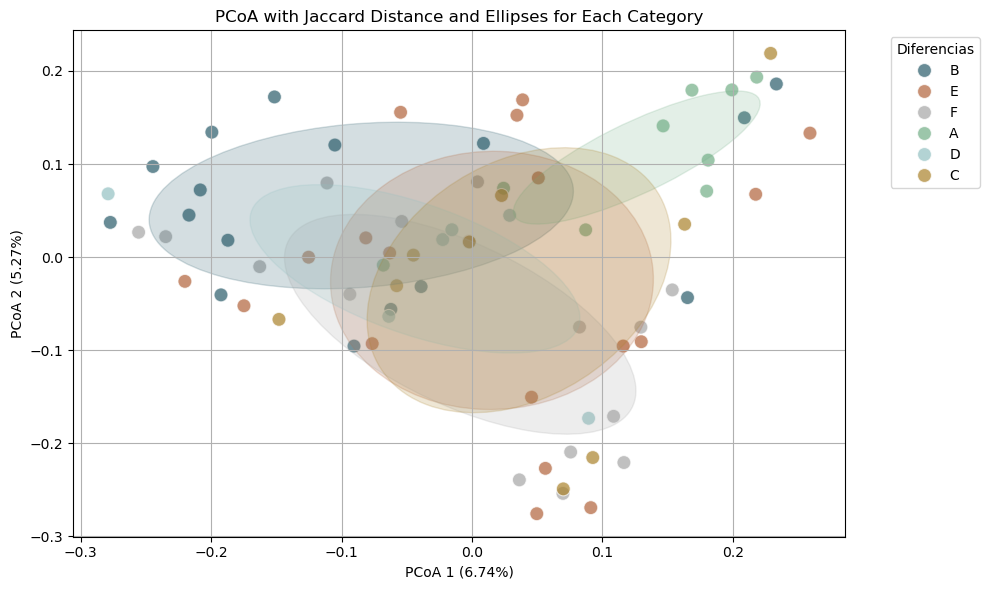

In [33]:
# Plot PCoA with Ellipses

plt.figure(figsize=(10, 6))

# Plot points colored by category
sns.scatterplot(data=merged_df, x='PC1', y='PC2', hue='Diferencias', palette=category_colors, s=100, alpha=0.7)

# Create ellipses for each category
for level in merged_df['Diferencias'].unique():
    subset = merged_df[merged_df['Diferencias'] == level]
    if len(subset) > 1:  # Only attempt to create ellipses if there are enough points
        cov = np.cov(subset[['PC1', 'PC2']].values.T)
        mean = subset[['PC1', 'PC2']].mean()
        eigvals, eigvecs = np.linalg.eigh(cov)
        order = eigvals.argsort()[::-1]
        eigvals, eigvecs = eigvals[order], eigvecs[:, order]
        angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
        width, height = 2 * np.sqrt(eigvals)  # Width and height are 2 standard deviations
        ellipse = mpatches.Ellipse(mean, width, height, angle=angle, color=category_colors[level], alpha=0.2)
        plt.gca().add_patch(ellipse)
        

# Adjust the legend position
plt.legend(title='Diferencias', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)

plt.title('PCoA with Jaccard Distance and Ellipses for Each Category')
plt.xlabel(f'PCoA 1 ({pcoa_results.proportion_explained[0] * 100:.2f}%)')
plt.ylabel(f'PCoA 2 ({pcoa_results.proportion_explained[1] * 100:.2f}%)')
plt.grid(True)
plt.tight_layout()
plt.show()

/hpcfs/home/ciencias_biologicas/mf.penav1/.miniforge/envs/python/lib/python3.12/site-packages/matplotlib/patches.py:1638: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  center = (self.convert_xunits(self._center[0]),
/hpcfs/home/ciencias_biologicas/mf.penav1/.miniforge/envs/python/lib/python3.12/site-packages/matplotlib/patches.py:1639: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.convert_yunits(self._center[1]))
/hpcfs/home/ciencias_biologicas/mf.penav1/.miniforge/envs/python/lib/python3.12/site-packages/matplotlib/patches.py:1638: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a

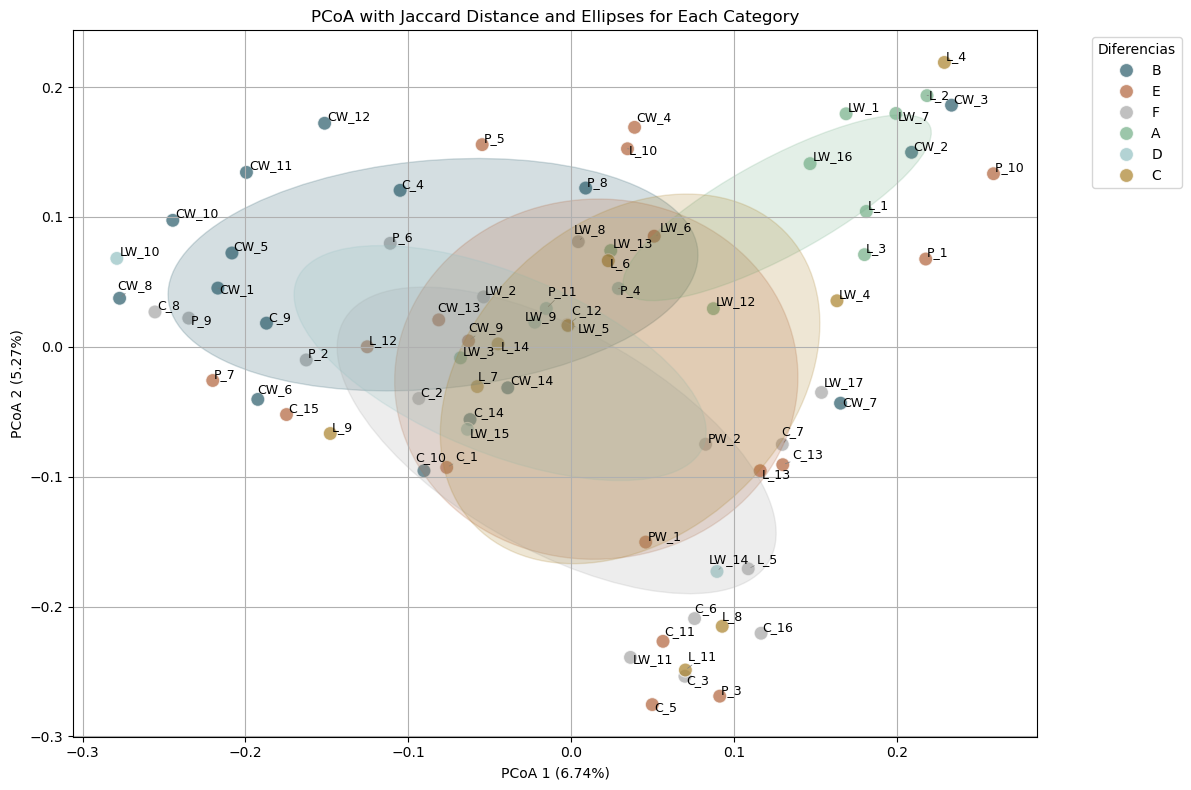

In [44]:
from adjustText import adjust_text

# Set figure size
plt.figure(figsize=(12, 8))

# Create the scatterplot
ax = sns.scatterplot(
    data=merged_df,
    x='PC1',
    y='PC2',
    hue='Diferencias',
    palette=category_colors,
    s=100,
    alpha=0.7
)

# Store all text labels for adjustment
texts = []
for i, row in merged_df.iterrows():
    texts.append(ax.text(
        row['PC1'], row['PC2'], str(row.name),
        fontsize=9,
        # Optional: add a semi-transparent box to help readability
        #bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', pad=1)
    ))

# Adjust label positions to avoid overlaps
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Create ellipses for each category
for level in merged_df['Diferencias'].unique():
    subset = merged_df[merged_df['Diferencias'] == level]
    if len(subset) > 1:
        cov = np.cov(subset[['PC1', 'PC2']].values.T)
        mean = subset[['PC1', 'PC2']].mean()
        eigvals, eigvecs = np.linalg.eigh(cov)
        order = eigvals.argsort()[::-1]
        eigvals, eigvecs = eigvals[order], eigvecs[:, order]
        angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
        width, height = 2 * np.sqrt(eigvals)
        ellipse = mpatches.Ellipse(
            xy=mean,
            width=width,
            height=height,
            angle=angle,
            color=category_colors[level],
            alpha=0.2
        )
        ax.add_patch(ellipse)

# Adjust legend and labels
plt.legend(title='Diferencias', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)
plt.title('PCoA with Jaccard Distance and Ellipses for Each Category')
plt.xlabel(f'PCoA 1 ({pcoa_results.proportion_explained[0] * 100:.2f}%)')
plt.ylabel(f'PCoA 2 ({pcoa_results.proportion_explained[1] * 100:.2f}%)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
# 1. Calculate Centroids and Pairwise Distances

from scipy.spatial.distance import pdist, squareform

# Calculate centroids for each category
centroids = merged_df.groupby('Diferencias')[['PC1', 'PC2']].mean()

# Calculate pairwise distances between centroids
centroid_distances = pd.DataFrame(
    squareform(pdist(centroids)),
    index=centroids.index,
    columns=centroids.index
)
print("Pairwise distances between category centroids:\n", centroid_distances)

Pairwise distances between category centroids:
 Diferencias         A         B         C         D         E         F
Diferencias                                                            
A            0.000000  0.217466  0.159744  0.207926  0.172500  0.224546
B            0.217466  0.000000  0.145152  0.079535  0.128512  0.148446
C            0.159744  0.145152  0.000000  0.080713  0.020753  0.065395
D            0.207926  0.079535  0.080713  0.000000  0.060326  0.068915
E            0.172500  0.128512  0.020753  0.060326  0.000000  0.053051
F            0.224546  0.148446  0.065395  0.068915  0.053051  0.000000


In [36]:
#permanova

from skbio.stats.distance import permanova
from skbio.stats.distance import DistanceMatrix

# Create a distance matrix from your PCoA coordinates (PC1, PC2)
distance_matrix = pdist(merged_df[['PC1', 'PC2']])
distance_matrix = DistanceMatrix(squareform(distance_matrix), ids=merged_df.index)

# PERMANOVA test
result = permanova(distance_matrix, merged_df['Diferencias'])
print(result)

method name               PERMANOVA
test statistic name        pseudo-F
sample size                      74
number of groups                  6
test statistic             3.487254
p-value                       0.003
number of permutations          999
Name: PERMANOVA results, dtype: object


/tmp/ipykernel_2427883/1925326269.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='Diferencias', y='PC1', palette=category_colors, order=category_order)
/tmp/ipykernel_2427883/1925326269.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='Diferencias', y='PC2', palette=category_colors, order=category_order)


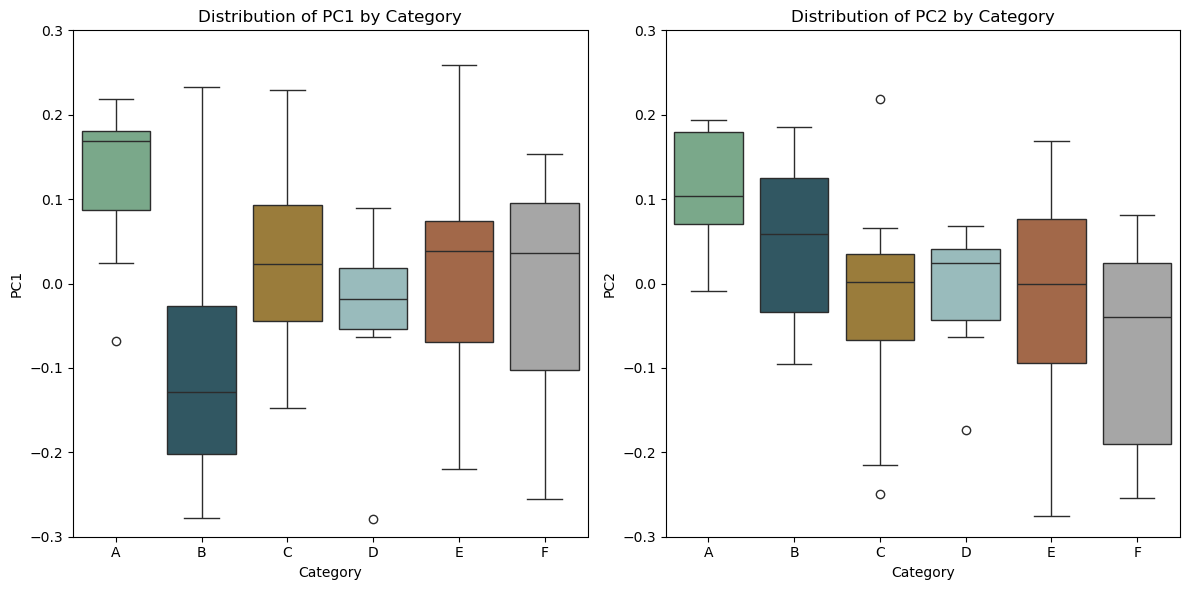

In [37]:
# Define the order for the categories
category_order = ['A', 'B', 'C', 'D', 'E', 'F']

# Plot boxplots for PC1 and PC2
plt.figure(figsize=(12, 6))

# Boxplot for PC1
plt.subplot(1, 2, 1)
sns.boxplot(data=merged_df, x='Diferencias', y='PC1', palette=category_colors, order=category_order)
plt.title('Distribution of PC1 by Category')
plt.xlabel('Category')
plt.ylabel('PC1')
plt.ylim(-0.3, 0.3)  # Set y-axis limits

# Boxplot for PC2
plt.subplot(1, 2, 2)
sns.boxplot(data=merged_df, x='Diferencias', y='PC2', palette=category_colors, order=category_order)
plt.title('Distribution of PC2 by Category')
plt.xlabel('Category')
plt.ylabel('PC2')
plt.ylim(-0.3, 0.3)  # Set y-axis limits

plt.tight_layout()
plt.show()